# Topic Modelling LDA, Bert

In [1]:
!pip install bertopic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 51.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 2.7 MB/s eta 0:00:00


## Importing Libraries

In [2]:
import pandas as pd
import nltk
import spacy
import gensim
from gensim.parsing.preprocessing import remove_stopwords
from nltk.stem import SnowballStemmer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt

from bertopic import BERTopic

In [3]:
nlp = spacy.load("en_core_web_sm")

## Loading Data

In [4]:
data = pd.read_csv("/kaggle/input/abc-news-sample/abcnews_sample.csv")
data.head()

,publish_date,headline_text
0,20050627,lawyer claims aust govt has abandoned corby
1,20051206,singapore tells spouses of patients hiv status
2,20141119,iron ore price slumps to new five year low
3,20060203,youth crime prevention schemes share in funds
4,20190521,harry triguboff speaks to the business


## Text PreProceessing

In [5]:
data['splitted_text'] = [x.split() for x in data['headline_text']]

### Removing Stopwords

In [6]:
processed_texts = [remove_stopwords(x).split() for x in data['headline_text']]

### Stemming

In [7]:
ss = SnowballStemmer("english")
stemmed_texts = [[ss.stem(word) for word in text] for text in processed_texts]

### Lemmatization

In [8]:
processed_texts = [[token.lemma_ for token in nlp(" ".join(text))] for text in stemmed_texts]

# Gensim

In [9]:
dictionary = gensim.corpora.Dictionary(processed_texts)

In [10]:
dictionary.filter_extremes(no_below=15, no_above=0.1, keep_n=100000)

In [11]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_texts]

In [12]:
lda_model = gensim.models.LdaMulticore(bow_corpus, 
                                       num_topics=3, 
                                       id2word = dictionary, 
                                       passes = 20)

In [13]:
for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} \nWords: {}".format(topic, idx ))
    print("\n")

Topic: 0.015*"plan" + 0.011*"interview" + 0.010*"council" + 0.010*"attack" + 0.010*"urg" + 0.009*"kill" + 0.008*"govt" + 0.008*"hit" + 0.007*"car" + 0.007*"school" 
Words: 0


Topic: 0.020*"new" + 0.015*"say" + 0.013*"australia" + 0.010*"win" + 0.010*"australian" + 0.009*"warn" + 0.008*"fund" + 0.008*"qld" + 0.008*"health" + 0.007*"day" 
Words: 1


Topic: 0.030*"polic" + 0.027*"man" + 0.014*"charg" + 0.013*"court" + 0.010*"death" + 0.010*"chang" + 0.009*"face" + 0.008*"murder" + 0.008*"woman" + 0.008*"call" 
Words: 2




# Sklearn

In [14]:
processed_texts = [' '.join(x) for x in processed_texts]

In [15]:
vectorizer = CountVectorizer()

dtm = vectorizer.fit_transform(processed_texts)

In [16]:
lda = LatentDirichletAllocation(n_components=3, random_state=42)
lda.fit(dtm)

LatentDirichletAllocation(n_components=3, random_state=42)

In [17]:
perplexities = []
log_likelihoods = []
for num_topics in range(2,11):
    lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
    lda.fit(dtm)
    
    perplexities.append(lda.perplexity(dtm))
    log_likelihoods.append(lda.score(dtm))

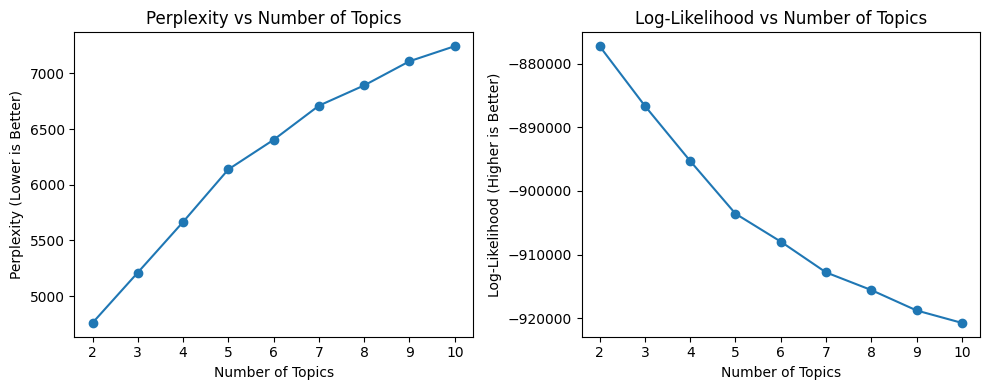

In [18]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(range(2,11), perplexities, marker='o')
plt.xlabel("Number of Topics")
plt.ylabel("Perplexity (Lower is Better)")
plt.title("Perplexity vs Number of Topics")

plt.subplot(1, 2, 2)
plt.plot(range(2,11), log_likelihoods, marker='o')
plt.xlabel("Number of Topics")
plt.ylabel("Log-Likelihood (Higher is Better)")
plt.title("Log-Likelihood vs Number of Topics")

plt.tight_layout()
plt.show()

In [19]:
!pip install bertopic

In [20]:
model = BERTopic(verbose=True,embedding_model='paraphrase-MiniLM-L3-v2', min_topic_size= 7)
headline_topics, _ = model.fit_transform(processed_texts)

2025-02-26 09:37:24,077 - BERTopic - Embedding - Transforming documents to embeddings.


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.04k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/69.6M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling%2Fconfig.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/625 [00:00<?, ?it/s]

2025-02-26 09:38:00,704 - BERTopic - Embedding - Completed ✓
2025-02-26 09:38:00,705 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-02-26 09:38:36,527 - BERTopic - Dimensionality - Completed ✓
2025-02-26 09:38:36,529 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-02-26 09:38:39,349 - BERTopic - Cluster - Completed ✓
2025-02-26 09:38:39,372 - BERTopic - Representation - Extracting topics from clusters using representation models.
2025-02-26 09:38:39,996 - BERTopic - Representation - Completed ✓


In [21]:
freq = model.get_topic_info()

In [22]:
len(freq['Topic'].unique())

448

In [23]:
model.get_topic(freq.iloc[1]['Topic'])

[('interview', 0.16500373059156806),
 ('extend', 0.03508375116536054),
 ('brett', 0.024435710842751746),
 ('nathan', 0.020940142512791915),
 ('geoff', 0.020940142512791915),
 ('toovey', 0.02078209771951157),
 ('666', 0.01966527496220158),
 ('luke', 0.018700375432599906),
 ('andrew', 0.017474332320316546),
 ('neil', 0.017331744950263645)]

In [24]:
model.visualize_barchart(top_n_topics=6)

In [25]:
model.visualize_topics()